Epoch   0 / iter   0, loss = 0.1234
Epoch   0 / iter   1, loss = 0.1062
Epoch   0 / iter   2, loss = 0.1169
Epoch   0 / iter   3, loss = 0.1051
Epoch   0 / iter   4, loss = 0.1433
Epoch   0 / iter   5, loss = 0.1005
Epoch   0 / iter   6, loss = 0.1193
Epoch   0 / iter   7, loss = 0.1127
Epoch   0 / iter   8, loss = 0.1234
Epoch   0 / iter   9, loss = 0.1029
Epoch   0 / iter  10, loss = 0.1092
Epoch   0 / iter  11, loss = 0.0837
Epoch   0 / iter  12, loss = 0.0975
Epoch   0 / iter  13, loss = 0.1188
Epoch   0 / iter  14, loss = 0.0859
Epoch   0 / iter  15, loss = 0.0804
Epoch   1 / iter   0, loss = 0.0923
Epoch   1 / iter   1, loss = 0.0789
Epoch   1 / iter   2, loss = 0.0907
Epoch   1 / iter   3, loss = 0.0777
Epoch   1 / iter   4, loss = 0.0985
Epoch   1 / iter   5, loss = 0.1110
Epoch   1 / iter   6, loss = 0.0799
Epoch   1 / iter   7, loss = 0.0688
Epoch   1 / iter   8, loss = 0.0688
Epoch   1 / iter   9, loss = 0.0931
Epoch   1 / iter  10, loss = 0.0729
Epoch   1 / iter  11, loss =

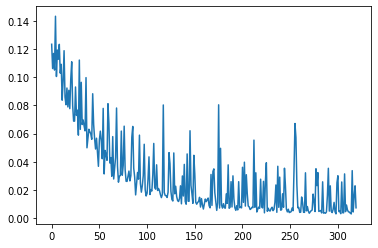

In [2]:
import numpy as np
import matplotlib.pyplot as plt


def load_data():
    # input data
    datafile = './dublinDataPrice.data'
    data = np.fromfile(datafile, sep=' ')

    # from district to type, they are variables, price is the result.
    feature_names = [ 'distrcit','area','bedroom','latitude','longitude','type','price' ]
    feature_num = len(feature_names)

    # change the shape
    data = data.reshape([data.shape[0] // feature_num, feature_num])

    #set training data and testing data
    ratio = 0.8
    offset = int(data.shape[0] * ratio)
    training_data = data[:offset]
    test_data = data[offset:]
    return training_data, test_data

    # calculate max, min, sum, average
    maximums, minimums, avgs = training_data.max(axis=0),\
                               training_data.min(axis=0),\
                               training_data.sum(axis=0) / training_data.shape[0]

    
    for i in range(feature_num):
        print(maximums[i], minimums[i], avgs[i])
        data[:, i] = (data[:, i] - avgs[i]) / (maximums[i] - minimums[i])

    
    


class modelNetwork(object):
    def __init__(self, num_of_weights):
        
        self.w = np.random.randn(num_of_weights, 1)
        self.b = 0.

    def forward(self, x):
        z = np.dot(x, self.w) + self.b
        return z

    def loss(self, z, y):
        error = z - y
        num_samples = error.shape[0]
        cost = error * error
        cost = np.sum(cost) / num_samples
        return cost

    def gradient(self, x, y):
        z = self.forward(x)
        N = x.shape[0]
        gradient_w = 1. / N * np.sum((z - y) * x, axis=0)
        gradient_w = gradient_w[:, np.newaxis]
        gradient_b = 1. / N * np.sum(z - y)
        return gradient_w, gradient_b

    def update(self, gradient_w, gradient_b, eta=0.01):
        self.w = self.w - eta * gradient_w
        self.b = self.b - eta * gradient_b

    def train(self, training_data, num_epoches, batch_size=10, eta=0.01):
        n = len(training_data)
        losses = []
        for epoch_id in range(num_epoches):            
            np.random.shuffle(training_data)
            mini_batches = [training_data[k:k + batch_size] for k in range(0, n, batch_size)]
            for iter_id, mini_batch in enumerate(mini_batches):
                print(self.w.shape)
                print(self.b)
                x = mini_batch[:, :-1]
                y = mini_batch[:, -1:]
                a = self.forward(x)
                loss = self.loss(a, y)
                gradient_w, gradient_b = self.gradient(x, y)
                self.update(gradient_w, gradient_b, eta)
                losses.append(loss)
                print('Epoch {:3d} / iter {:3d}, loss = {:.4f}'.format(epoch_id, iter_id, loss))

        return losses



train_data, test_data = load_data()


net = modelNetwork(6)
# training
losses = net.train(train_data, num_epoches=20, batch_size=100, eta=0.1)

# loss plot
plot_x = np.arange(len(losses))
plot_y = np.array(losses)
plt.plot(plot_x, plot_y)
plt.show()
